This notebook generates the network diagram using networkX

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

### Import Network Diagram

In [23]:
directory = '../data/'

In [24]:
network_df = pd.read_csv(directory+'Network_tweets.csv')
network_df.columns = ['user1', 'user2', 'date', 'type']

In [26]:
network_df.head()

,user1,user2,date,type
0,sblogga,sblogga,2021-09-29 23:59:33+00:00,Tweet
1,zpaikin,zpaikin,2021-09-29 23:59:08+00:00,Tweet
2,robertbenzie,robertbenzie,2021-09-29 23:58:49+00:00,Tweet
3,OrcaCedarbough,OrcaCedarbough,2021-09-29 23:57:48+00:00,Tweet
4,gtlem,gtlem,2021-09-29 23:56:45+00:00,Tweet


### Graph Functions

In [27]:
# Colorful graph plot function

def nx_plot(G):
    pos = nx.spring_layout(G)

    node_sizes = [3 + 10 * i for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    cmap = plt.cm.plasma

    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
    edges = nx.draw_networkx_edges(
        G,
        pos,
        node_size=node_sizes,
        arrowstyle="->",
        arrowsize=10,
        edge_color=edge_colors,
        edge_cmap=cmap,
        width=2,
    )
    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edge_alphas[i])

    pc = mpl.collections.PatchCollection(edges, cmap=cmap)
    pc.set_array(edge_colors)
    plt.colorbar(pc)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

In [28]:
# Generate degree distribution plots function

def degree_dist(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

### Generate Graph

In [29]:
def gen_graph(network_df):
    rt_in = network_df.type=='Retweet'
    rts = network_df[rt_in]
    tweets = network_df.drop(index= rts.index)
    graph = nx.DiGraph()
    graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
    graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')
    return graph

In [30]:
graph = gen_graph(network_df)

### Draw Simple Graph

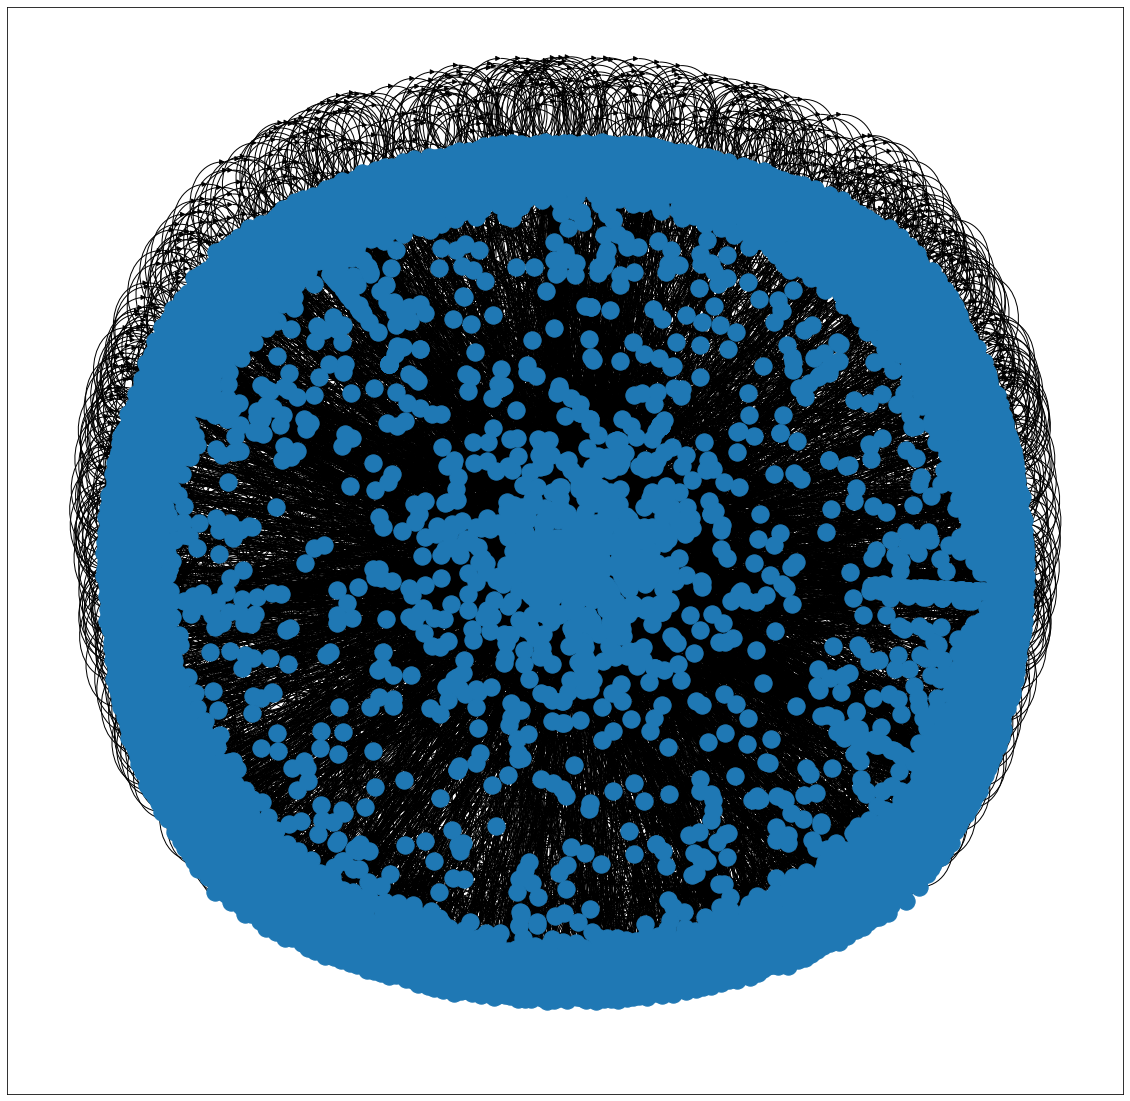

In [31]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.show()

### Network Features

In [32]:
degree = pd.DataFrame(pd.Series(dict(graph.degree)), columns=['degree'])

In [33]:
centrality = pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)).sort_values()

In [34]:
closeness = pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph)).sort_values(ascending=False)

In [35]:
retweets_res = network_df[network_df.type == "Retweet"].groupby('user2').aggregate({'type':'count'})
retweets_res.columns = ['retweet']

### Retweets recieved by top influencers

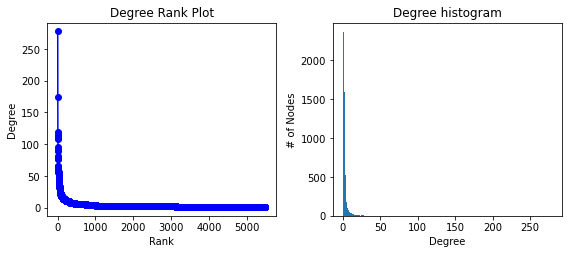

In [36]:
degree_dist(graph)

In [44]:
closeness

JustinTrudeau      0.052197
AnnamiePaul        0.037040
CanadianGreens     0.021852
jkenney            0.019632
erinotoole         0.019240
                     ...   
sherryfirestone    0.000000
SC2983ReuniteUs    0.000000
7N7420             0.000000
Wynjym             0.000000
paulatwal          0.000000
Length: 5499, dtype: float64

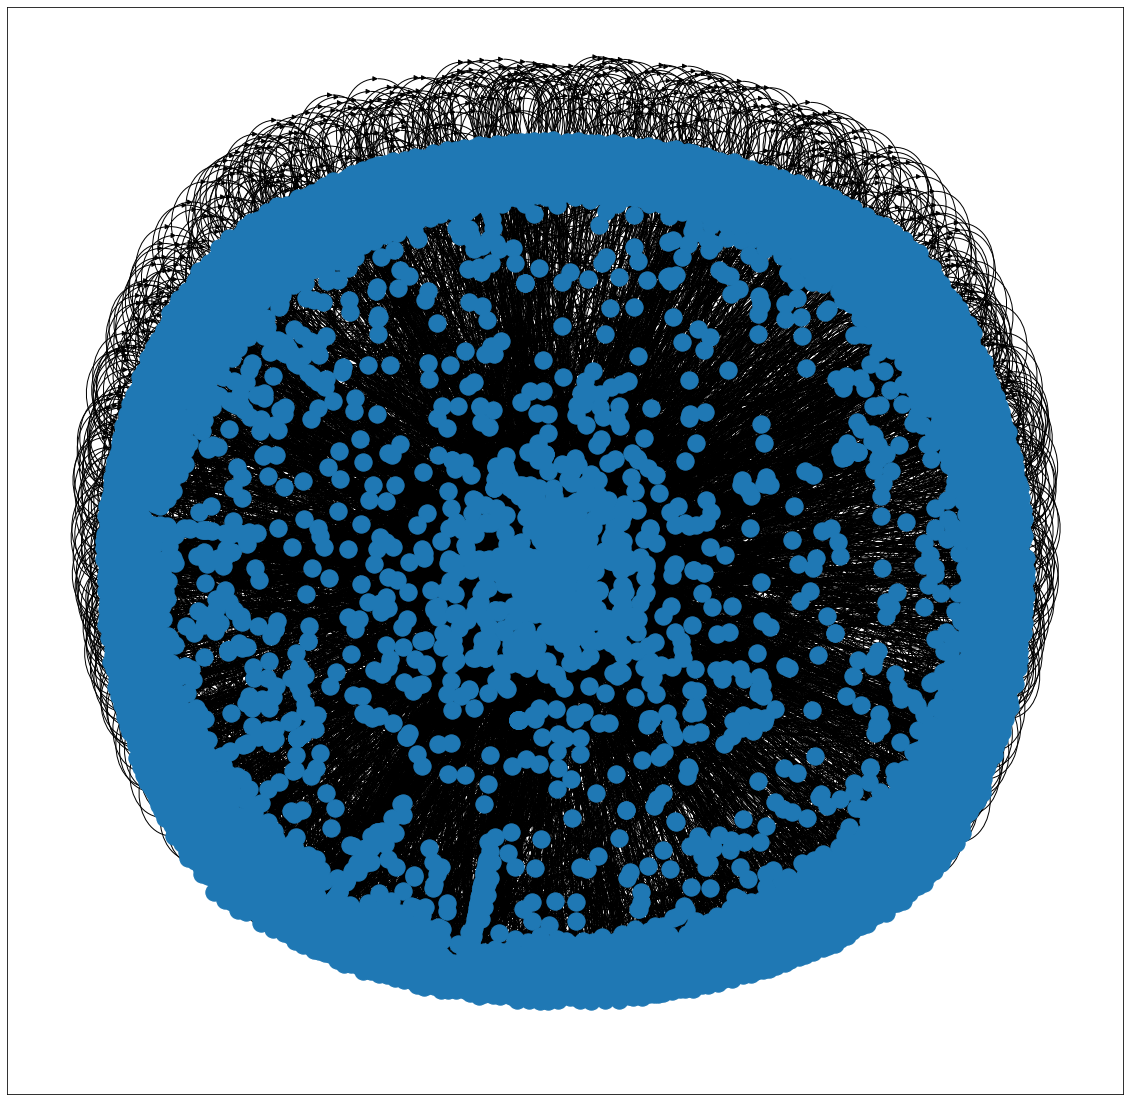

In [37]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.show()

### Posts made by top influencers

In [292]:
graph = gen_graph(top_100_nodes)

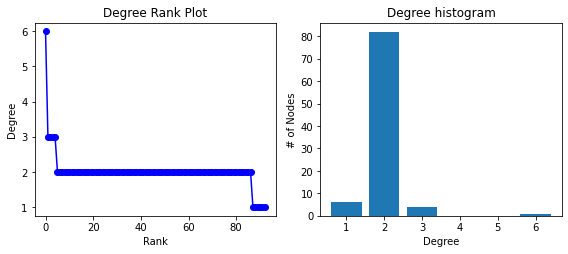

In [293]:
degree_dist(graph)

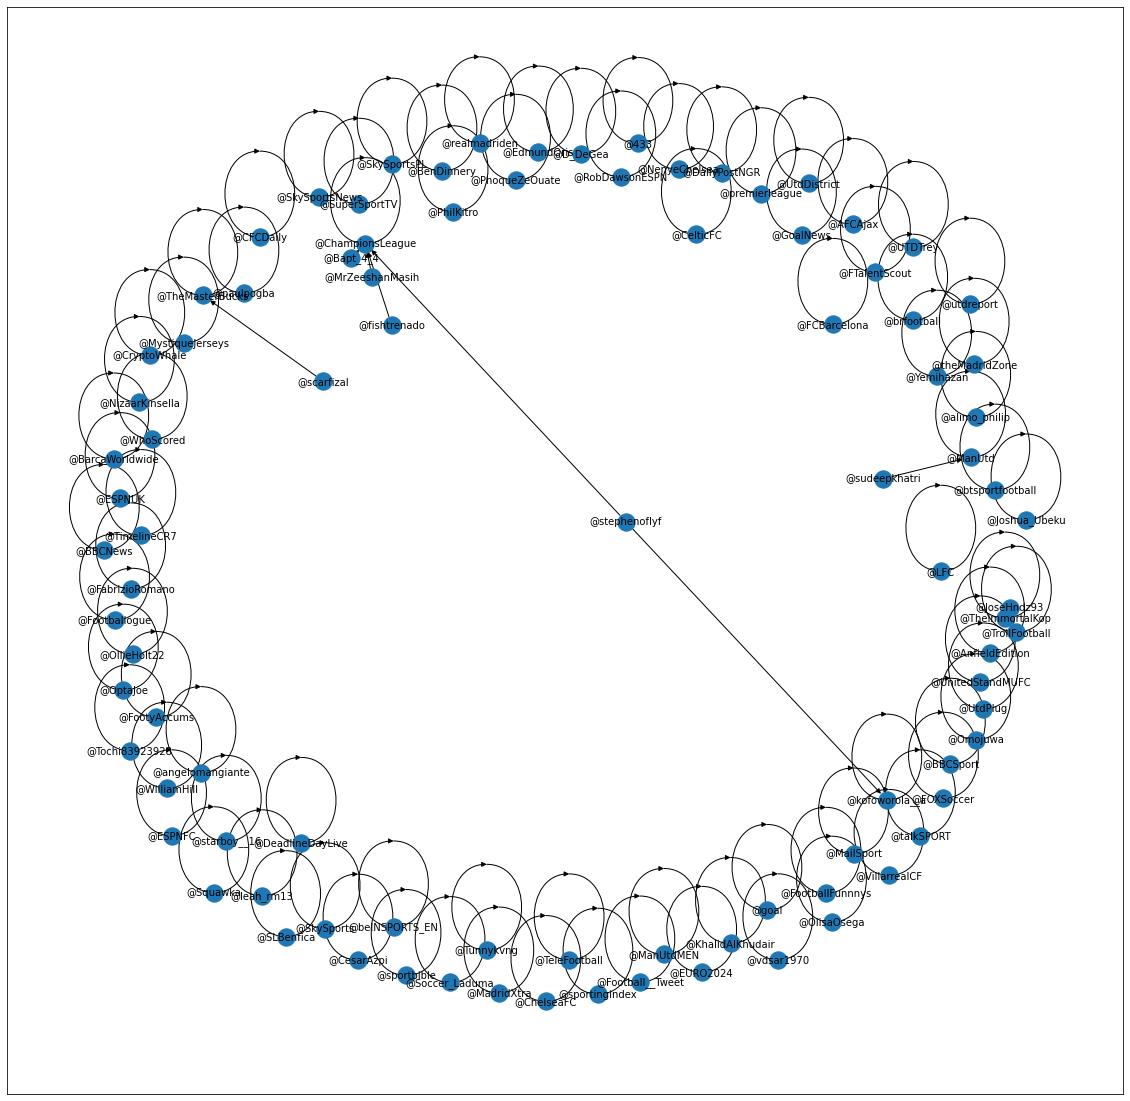

In [294]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, font_size = 10)
plt.show()

### Retweets between top Influencers

In [301]:
graph = gen_graph(top_100_nodes_rt)

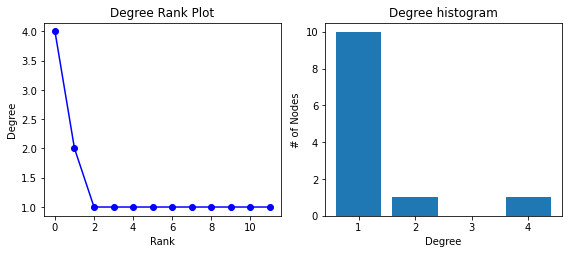

In [302]:
degree_dist(graph)

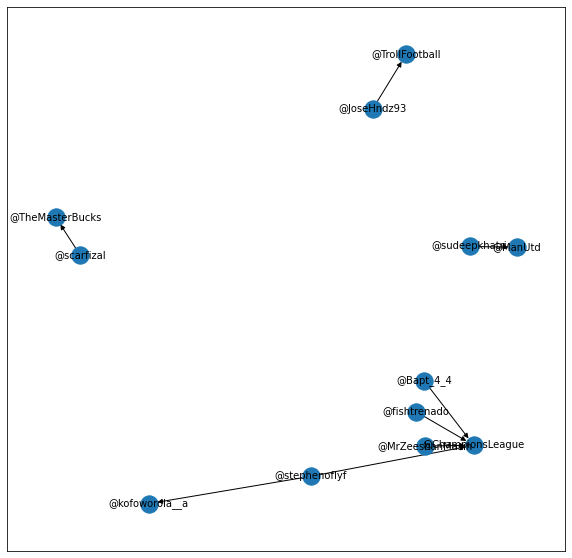

In [303]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, font_size = 10)
plt.show()